<a href="https://colab.research.google.com/github/Shivam10816/CS22M082_ASSIGNEMNT_1/blob/q2/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question** **1**


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.datasets import fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


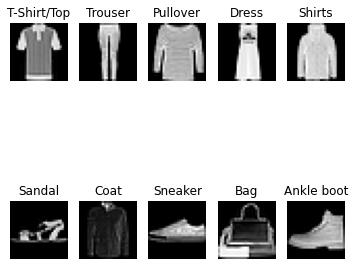

In [2]:
titles = ["T-Shirt/Top","Trouser","Pullover","Dress","Shirts","Sandal","Coat","Sneaker","Bag","Ankle boot"]
IMG = plt.figure(figsize=(6,6))
for i in range(0,10):
  index =random.choice(np.where(training_labels==i)[0])
  IMG.add_subplot(2, 5, i+1)
  plt.imshow(training_images[index],cmap="gray")
  plt.title(titles[i])
  plt.axis("off")



QUESTION **2**

In [80]:
hi = [3,10,20,30,40]
class FeedForwardNeuralNetwork :
    hidden_layers=0
    hi=[]
    A=[]
    H=[]
    W=[]
    b=[]
    train_data=[] 
    train_lable=[]
    l=0
    def __init__(self,X_data ,X_lable,hidden_layers):
      self.train_data = X_data
      self.train_lable = X_lable
      self.hidden_layers =hidden_layers
      self.l= len(self.train_data[0])*len(self.train_data[0])

      self.W =[np.random.randint(-50,50,size=(hi[0],self.l))] 
      self.b =[np.random.randint(-50,50,size=(1,hi[0]))]
      self.A =[np.zeros((1,hi[0]))]
      self.H = [np.zeros((1,hi[0]))]
      for i in range(1,len(hi)) :
        self.W.append(np.random.randint(-50,50,size=(hi[i],hi[i-1])))
        self.b.append(np.random.randint(-50,50,size=((1,hi[i]))))
        self.A.append(np.zeros((1,hi[i])))
        self.H.append(np.zeros((1,hi[i])))
      self.W.append(np.random.randint(-50,50,size=(10,hi[-1])))
      self.A.append(np.zeros((1,10)))
      self.b.append(np.random.randint(-50,50,size=(1,10)))

      # for i in self.W :
      #   print(i.shape)
      # for i in self.b :
      #   print(i.shape)
      # for i in self.A :
      #   print(i.shape)
      # for i in self.H :
      #   print(i.shape)
      

    
    def softmax(self,z):
      s = np.max(z)
      e_x = np.exp(z - s)
      div = np.sum(e_x)
      return e_x / div
    
   
    def sigmoid(self,H,A):
      for i in range(0,len(A)):
          if A[i]<0 :
            H[i]= np.exp(A[i])/(1+np.exp(A[i]))
          else:
            H[i]=  1/(1+np.exp(-A[i]))
      return H
    def forward_pro(self,index):


      for i in range(0,hi[0]):
  
        x = np.reshape(self.train_data[i],(self.l));
        self.A[0][0][i]=(np.dot(np.reshape(self.W[0][i],(1,784)),x)+self.b[0][0][i])
      
      for i in range(1,len(self.hi)):
        self.H[i-1][0]=sigmoid(self.H[i-1][0],self.A[i-1][0])
        for j in range(0,self.hi[i]):
          self.A[i][0][j]=(np.dot(self.W[i][j],self.H[i-1][0])+self.b[i][0][j])
      
      print()
      # for i in self.W :
      #   print(i.shape)
      # for i in self.b :
      #   print(i.shape)
      # for i in self.A :
      #   print(i.shape)
      # for i in self.H :
      #   print(i.shape)

    def back_prop(self,i):
        W_theta , b_theta,H_theta,A_theta =self.W,self.b,self.H,self.A
        y_hat = self.softmax((self.A[-1][0]))
        ey = np.zeros((1,len(y_hat)))

        ey[0][self.train_lable[i]]=1;

        L =len(A_theta)


        A_theta[L-1]=(-(ey-y_hat))

        for k in range(L-1,0,-1):
          
          W_theta[k]=((np.matmul(A_theta[k].transpose(),self.H[k-1])))
          b_theta[k]=A_theta[k]
          H_theta[k-1]=np.matmul(A_theta[k],self.W[k])
          
          g_z = self.A[k-1]
          a_k_1 = g_z
          g_z = self.sigmoid(g_z[0],self.A[k-1][0])
          
          A_theta[k-1]=H_theta[k-1]*(g_z*(1-g_z))

          

        x = np.reshape(self.train_data[i],(1,self.l));
        W_theta[0] = ((np.matmul(A_theta[0].transpose(),x)))
        b_theta[0]=A_theta[0]

        print("-------start-----")
        for i in W_theta :
          print(i.shape)
        for i in b_theta :
          print(i.shape)
        for i in A_theta :
          print(i.shape)
        for i in H_theta :
          print(i.shape)

        
        

      

      
    
N = FeedForwardNeuralNetwork(training_images,training_labels,hi) 
N.forward_pro(1000) 
N.back_prop(1000)    


-------start-----
(3, 784)
(10, 3)
(20, 10)
(30, 20)
(40, 30)
(10, 40)
(1, 3)
(1, 10)
(1, 20)
(1, 30)
(1, 40)
(1, 10)
(1, 3)
(1, 10)
(1, 20)
(1, 30)
(1, 40)
(1, 10)
(1, 3)
(1, 10)
(1, 20)
(1, 30)
(1, 40)


In [62]:
a=np.ones((1,10))
b=np.ones((1,10))
(1-(a+b)).shape


(1, 10)

In [30]:
for k in range(10,0,-1):
  print(k)

10
9
8
7
6
5
4
3
2
1


In [ ]:
from numpy.random import randint

W =[np.random.randint(-5,5,size=(hi[0],28*28))] 
b =[np.random.randint(-5,5,size=(hi[0]))]

A =[np.zeros((hi[0]))]
H = [np.zeros(hi[0])]
for i in range(1,len(hi)) :
  W.append(np.random.randint(-5,5,size=(hi[i],hi[i-1])))
  b.append(np.random.randint(-5,5,size=(hi[i])))
  A.append(np.zeros((hi[i])))
  H.append(np.zeros(hi[i]))
W.append(np.random.randint(-5,5,size=(10,hi[-1])))
A.append(np.zeros((10)))
b.append(np.random.randint(-5,5,size=(10)))
print(len(W))
print(len(b))
print(len(A))
print(len(H))

print(H[0].shape)





5
5
5
4
(3,)


In [ ]:
def sigmoid(H,A):
  for i in range(0,len(A)):
      if A[i]<0 :
        H[i]= np.exp(A[i])/(1+np.exp(A[i]))
      else:
        H[i]=  1/(1+np.exp(-A[i]))
  return H

  

 

  



    

  




  

In [ ]:
sigmoid(H[0],A[0])

array([0.01368062, 0.01414846, 0.05406433])

In [ ]:
for i in range(0,hi[1]):
  A[1][i]=(np.dot(W[1][i],H[0])+b[1][i])/100

In [ ]:
print(A[1])
H[1]=1/(1+np.exp(-A[1]))
print(H[1])

[ 0.0214001   0.01039123  0.02029156  0.00754342  0.00035816 -0.00211297
 -0.0504223  -0.02993042  0.0082533   0.04254071]
[0.50534982 0.50259778 0.50507272 0.50188585 0.50008954 0.49947176
 0.48739709 0.49251795 0.50206331 0.51063357]


In [13]:
a,b,c,d=[],[],[],[]
type(d)

list

In [ ]:
y =np.zeros((10))
y=np.sof
y

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [ ]:
def softmax(z):
    s = np.max(z)
    e_x = np.exp(z - s)
    div = np.sum(e_x)
    return e_x / div


array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])